# Question 1:

The cousin to AnotherMotifSearch from what we studied is most likely BruteForceMotifSearchAgain. They are both similar in the sense that they involve a maximization scheme (rather than minimization one such as Median string) to find the motif. This maximization scheme is for maximizing the score of "consensus" of the motif that we compare across the t sequences. They both need exactly the same inputs, begin their search from the indices (1, 1, 1, etc.), and return at the end BestMotif, which is a set of indices representing the start of the motif in every sequence. In general, the structures of the algorithms are very very similar.

For the differences,AnotherMotifSearch uses recursion as its iterative approach, while BruteForceSearchAgain uses a simple looping approach to evaluate each and every single kmer in each and every sequence in a non-recursive way. They are different in the step that compares the motifs (substrings) at every position in all the sequences. BruteForceMotifSearchAgain uses a combinatorial approach (that will be done by a tree structure later that involves NextLeaf, etc.), while AnotherMotifSearch uses recursion. BruteForceMotifSearchAgain will compare the motifs as follows, assuming we want to find all 4-mers in {1, 2, 3}: 

1, 1, 1, 1 then 1, 1, 1, 2 then 1, 1, 1, 3 then 1, 1, 2, 1 then ***1, 1, 2, 2***, and so on... Meanwhile, in AnotherMotifSearch, we loop through every possible starting position for the motif in the current sequence (current sequence itself will iterate to fetch all sequences). Then, we set s[currentSeq] to j. This step is basically for finding a new potential starting point for the motif in the current sequence. Then, we recursively call the function to evaluate all combinations of starting positions across the other sequences. So, the sequence will probably be as follows: 

1, 1, 1, 1 then 1, 1, 1, 2 then 1, 1, 1, 3 then 1, 1, 2, 1 then ***1, 1, 3, 1***, and so on..

So, they iterate through the possibilities in a slightly different way.

In [307]:
import time
import matplotlib.pyplot as plt
!pip install Bio
from Bio import SeqIO
import random

# **Question 2**

In [485]:
def max_nucleotide(n_counts):
    max = 0
    for n in n_counts:
        if n_counts[n] > max:
            max = n_counts[n]
    return max

# I used a dictionary to keep track of the scores. To my knowledge, dictionaries are found in all or most programming languages
def Score(s, DNA, l):
    score = 0
    DNA = [seq. upper() for seq in DNA] # a precautionary step since i don't know how the user will provide their inpit
    for i in range(l):
        nucleotide_counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0} # we have to make it 0 at the begnning of every different sequence
        # For each sequence, add to the count of the nucleotide at the motif position
        for seq_index in range(len(s)): # len(s) is the number of DNA sequences we have
            nucleotide = DNA[seq_index][s[seq_index] + i - 1]  # DNA[seq_index] tells us which sequence we are at
            # and s[seq_index + i - 1] tells us which position in that particular sequence we are at.
            nucleotide_counts[nucleotide] += 1 # we increase the count of that nucleotide by 1.
        # Add the maximum count of any nucleotide at this position to the score
        score += max_nucleotide(nucleotide_counts)
    return score

def NextLeaf(a, L, k):
    a = a[:]  # Create a copy to not modify the original array outside the function
    # That is because arrays are modified globally
    for i in range(L - 1, -1, -1):  # Start from the end of the array 'a'
        if a[i] < k:
            a[i] += 1
            return a
        a[i] = 1
    return a

def BrutceForceMotifSearchAgain(DNA, t, n, l):
    s = [1] * t
    # an initial best score
    best_score = Score(s, DNA, l)
    best_motif = s # an initial best motif
    
    while True:
        s = NextLeaf(s, t, n - l + 1)
        if Score(s, DNA, l) > best_score:
            best_score = Score(s, DNA, l)
            best_motif = s[:]
        if s == [1] * t:
            return best_motif

# I tested it on only 4 sequences, each of length 25. The example in the assignment takes forever to run!
        
DNA_sequences = [
"TAGATCTgggaaagtatttccacca",
"tTAGACCCatataattgttggctgc",
"ttatTAGGTCCaggtagtatcgtaa",
"acTAGATCCcctgttggcgccatct"
]

start_time = time.time()
best_motif = BrutceForceMotifSearchAgain(DNA_sequences, len(DNA_sequences), len(DNA_sequences[0]), 7)
end_time = time.time()
time_taken = (end_time - start_time) * 1000

print("Best motif: ", best_motif)
print("Time taken: ", time_taken)

Best motif:  [1, 2, 5, 3]
Time taken:  3037.4038219451904


In [486]:
def NextVertex(a, i, L, k):
    if i < L: # different from pseudocode
        a[i] = 1 # different from pseudocode
        return a, i + 1
    else:
        for j in range(L - 1, -1, -1): # L - 1 rather than L
            if a[j] < k:
                a[j] += 1
                return a, j+1 # j + 1 rather than j
        return a, 0

def Bypass(a, i, L, k):
    for j in range(i, -1, -1):
        if a[j] < k:
            a[j] += 1
            return a, j+1 # j + 1 rather than j
    return a, 0

# the differences between my code and the pseudocode is the only way it made it work. I am not exactly sure why it works
# But what I am sure of is this is the only way it works after I had tried tens of trials.

def BranchAndBoundMotifSearch(DNA, t, n, l):
    s = [1] * t
    bestScore = 0
    bestMotif = s
    i = 1
    
    while i > 0:
        if i < t:
            optimisticScore = Score(s, DNA, l) + (t-i) * l
            if optimisticScore < bestScore:
                s, i = Bypass(s, i, t, n - l + 1)
            else:
                s, i = NextVertex(s, i, t, n - l + 1)
        else:
            if Score(s, DNA, l) > bestScore:
                bestScore = Score(s, DNA, l)
                bestMotif = s[:]
            s, i = NextVertex(s, i, t, n - l + 1)
    
    return bestMotif

In [487]:
DNA_sequences = [seq. upper() for seq in DNA_sequences]

start_time = time.time()

best_motif = BranchAndBoundMotifSearch(DNA_sequences, len(DNA_sequences), len(DNA_sequences[0]), 7)

end_time = time.time()

time_taken = (end_time - start_time) * 1000

print("Best motif: ", best_motif)
print("Time taken: ", time_taken)

Best motif:  [1, 2, 5, 3]
Time taken:  289.8249626159668


# **Discussion (a)**

They both produce optimal and similar outputs. For the tested sequences, the optimal outputs are (1, 2, 5, 3), which is calculated correctly by both algorithms.

I tested both on a matrix of 4 sequences, each of length 25, and where kmer is 7.

BruteForceMotifSearchAgain takes around 3000 milliseconds, while BranchAndBoundMotifSearch took around 290 milliseconds. This makes sense since BranchAndBoundMotifSearch prunes, so it is theoritically faster, and as it turns out, practically faster too. That is, the first algorithm takes 3 seconds and the second takes quarter of a second. The difference is huge!

I cannot compare on the example in the assignment because it takes forever to run!!! But the difference in time between them is obvious.

# **Discussion (b)**

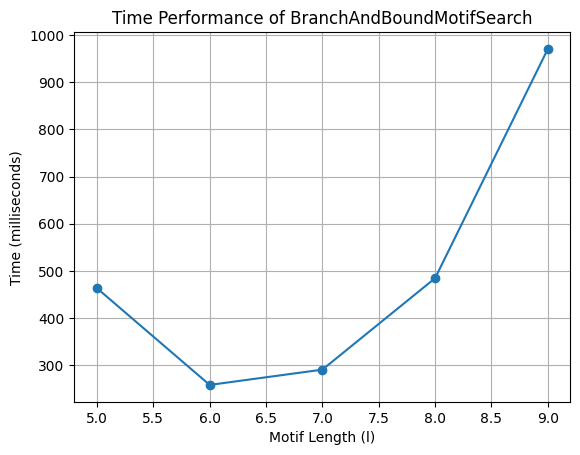

In [488]:
times = []
l_values = range(5, 10)

for l in l_values:
    start_time = time.time()
    BranchAndBoundMotifSearch(DNA_sequences, len(DNA_sequences), len(DNA_sequences[0]), l)
    end_time = time.time()
    times.append((end_time - start_time) * 1000)


plt.plot(l_values, times, marker='o')
plt.xlabel('Motif Length (l)')
plt.ylabel('Time (milliseconds)')
plt.title('Time Performance of BranchAndBoundMotifSearch')
plt.grid(True)
plt.show()

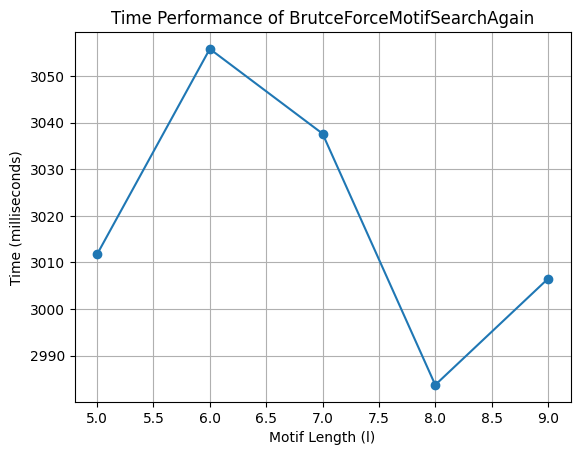

In [489]:
times = []
l_values = range(5, 10)

for l in l_values:
    start_time = time.time()
    BrutceForceMotifSearchAgain(DNA_sequences, len(DNA_sequences), len(DNA_sequences[0]), 7)
    end_time = time.time()
    times.append((end_time - start_time) * 1000)


plt.plot(l_values, times, marker='o')
plt.xlabel('Motif Length (l)')
plt.ylabel('Time (milliseconds)')
plt.title('Time Performance of BrutceForceMotifSearchAgain')
plt.grid(True)
plt.show()

As it is obvious from the graphs, as the motif length increases, the time increases! It is weird, though, that the graph is not smoothly increasing and instead exhibits sharp increases and decreases that may be illogical. For instance, a motif length of 5 takes more time than does 7. This behavior probably depends on random computational stuff that depends on the computer executing the code. But theoritically and mathematically, the time will increase as kmer length increases.

# **Question 3 (part a): Heuristic methods and their discussion**

In [490]:
def create_profile(motifs):
    # returns a list of dictionaries such that every dictionary is a column of the profile matrix
    k = len(motifs[0]) # the length of every motif, assuming they all have similar length
    t = len(motifs) # how many motifs we have
    profile = list(dict()) # initializing a list of dictionaries
    for i in range(k): # looping over the length of any motif
        profile_column = {'A': 1, 'C': 1, 'G': 1, 'T': 1}  # Starting with pseudocounts (by Laplace's succession rule)
        for motif in motifs: # looping over all the motifs
            profile_column[motif[i]] += 1 # incrementing the nucleotide at motif j, index i
        for key in profile_column:
            profile_column[key] /= (t + 4)  # Dividing by t+4 to account for pseudocounts
        profile.append(profile_column) # creating a dictionary for every position of the motifs
    return profile # profile is a k * t matrix with counts of nucleotides following Laplace's rule

def pattern_probability(profile, pattern):
    # returns the probability of a pattern given a profile
    probability = 1
    for i in range(len(pattern)): # looping over the length of the pattern
        # assuming pattern is "AGGCT", so we loop from 0 to 4
        probability *= profile[i][pattern[i]] # here we set our initial probability (1, cannot be 0)
        # so that it is equal to profile[i], which is profile[0] for example, and this is the first dictionary corresponding to the first column
        # pattern[i] is AGGCT[0], which is A for example. Therefore, this code retrieves the probability of finding nucleotide number i at profile column number i
        # so it multiplies probability of A in 1st column * probability of G in second column, and so on..
    return probability

def profile_most_probable_kmer(dna, profile, k):
    # this function uses the one above to find the pattern with the most probability
    max_probability = -1
    most_probable = dna[:k] # initializing a most probable pattern that is the first kmer of the sequence
    for i in range(len(dna) - k + 1): # we loop over all kmers of length k
        kmer = dna[i:i+k] # kmer retrieval
        probability = pattern_probability(profile, kmer) # find the kmer (pattern) probability
        if probability > max_probability:
            most_probable = kmer
            max_probability = probability
    return most_probable # output the kmer from a set of kmers in a dna sequence with the highest probability based on a certain profile

def hamming_distance(s1, s2):
    dist = 0
    for i in range(len(s1)):
        if s1[i] != s2[i]:
            dist+=1
    return dist

def consensus(motifs):
    k = len(motifs[0])
    consensus_seq = ''
    
    for i in range(k):  # Loop through the length of the kmer
        pos = [motif[i] for motif in motifs]
        consensus_seq += max(set(pos), key=pos.count)
    return consensus_seq

def Score_motifs(motifs):
    # now our score is the summation of the hamming distances between the consensus we created and every motif
    # so if consensus is AATGC, and our motifs are ATGAC, GATGC, and so on...
    # score will be hamming1 + hamming 2 + hamming3 and so on...
    score = 0
    for motif in motifs:
        score += hamming_distance(consensus(motifs), motif)

    return score

def GreedyMotifSearch(dna, k, t):
    best_motifs = [seq[:k] for seq in dna] # a list of the first k-mer motifs in the sequences
    # for example, AAT, GGT, AAC, and so on
    best_score = Score_motifs(best_motifs) # current best_score is generated from the best_motifs we just created
    
    for i in range(len(dna[0]) - k + 1): # looping over all kmers in a sequence
        motifs = [dna[0][i:i+k]] # to get all motifs (kmers) of the first DNA sequence
        for i in range(1, t): # looping over all DNA sequences (starting from 2nd sequence)
            profile = create_profile(motifs[:i]) # create a profile from this set of motifs
            kmer = profile_most_probable_kmer(dna[i], profile, k) # find the most probable kmer given that profile
            motifs.append(kmer) # add that kmer to the motifs list
        # to update the score and the best motifs
        if Score_motifs(motifs) < best_score:
            best_motifs = motifs
            best_score = Score_motifs(motifs)
            
    return best_motifs

# Example DNA sequences
DNA_sequences = [
"TAGATCTgggaaagtatttccacca",
"tTAGACCCatataattgttggctgc",
"ttatTAGGTCCaggtagtatcgtaa",
"acTAGATCCcctgttggcgccatct"
]

DNA_sequences = [seq. upper() for seq in DNA_sequences]

k = 7
t = len(DNA_sequences)

start_time = time.time()
motifs = GreedyMotifSearch(DNA_sequences, k, t)
end_time = time.time()
print(motifs)
print("time: ", (end_time-start_time) * 1000)

['TAGATCT', 'TAGACCC', 'TAGGTCC', 'TAGATCC']
time:  4.961729049682617


In [491]:
def random_motifs(dna,k):
    motifs = []
    for seq in dna:
        start = random.randint(0, len(seq)-k)
        motifs.append(seq[start:start + k])
    return motifs


# I tried to do similar to the pseudo-code in the lecture, but I am afraid something may be wrong, I am not sure.
def RandomizedProfileMotifSearch(dna, k, t):
    # Randomly select starting positions s=(s1,...,st) from DNA
    bestMotifs = random_motifs(dna, k)
    bestScore = Score_motifs(bestMotifs)

    while True:
        # Form profile P from s
        profile = create_profile(bestMotifs)
        motifs = []
        for i in range(t):
            motifs.append(profile_most_probable_kmer(dna[i], profile, k))
        if Score_motifs(motifs) < bestScore:
            bestScore = Score_motifs(motifs)
            bestMotifs = motifs
        else:
            return bestMotifs

# Example DNA sequences
DNA_sequences = [
"TAGATCTgggaaagtatttccacca",
"tTAGACCCatataattgttggctgc",
"ttatTAGGTCCaggtagtatcgtaa",
"acTAGATCCcctgttggcgccatct"
]

DNA_sequences = [seq. upper() for seq in DNA_sequences]

t = len(DNA_sequences)

start_time = time.time()
motifs = RandomizedProfileMotifSearch(DNA_sequences, 7, t)
end_time = time.time()
print(motifs)
print("time: ", (end_time-start_time) * 1000)

['CTGGGAA', 'TTGGCTG', 'TTATTAG', 'TTGGCGC']
time:  0.4062652587890625


In [293]:
# to read and parse a FASTA file. Code taken from the internet عشان أنجز بصراحة
def read_and_trim_fasta(file_path, nucleotide_length=250):
    sequences = []
    with open(file_path, 'r') as fasta_file:
        for record in SeqIO.parse(fasta_file, "fasta"):
            sequences.append(str(record.seq[:nucleotide_length]))
    return sequences

# because I am using kaggle. Please edit accordingly for other editors.
fasta_file_path = '/kaggle/input/gene-sequences-fasta/gene_sequences_10.fasta'
genes = read_and_trim_fasta(fasta_file_path, 250)

In [443]:
def GeneMotifs(genes, num_trials, kmer_length, heuristic_method):
    gene_motifs = []
    if heuristic_method == "g":
        for i in range(num_trials):
            motifs = GreedyMotifSearch(genes, kmer_length, len(genes))
            gene_motifs.append(motifs)
    elif heuristic_method == "r":
        for i in range(num_trials):
            motifs = RandomizedProfileMotifSearch(genes, kmer_length, len(genes))
            gene_motifs.append(motifs)
    return gene_motifs
    # this is a list of lists
    # the big list contains the different executions of the code
    # and every small list contains the motifs of the 10 genes.
    # then, we want to aggregate all the first motifs of all the small lists for the first gene
    # and all the second motifs of all the small lists for the second gene
    # and so on..
    # for every list of motifs from those, we want to find the consensus for every gene

In [444]:
# Aggregation function
def GeneConsensus(genes, num_trials, kmer_length, heuristic_method):
    gene_motifs = GeneMotifs(genes, num_trials, kmer_length, heuristic_method)
    gene_consensus = []
    for i in range(len(genes)):
        motifs_for_gene = [gm[i] for gm in gene_motifs]
        gene_consensus.append(consensus(motifs_for_gene))
    return gene_consensus

In [478]:
# I am trying 100 trials only not 1000 because it already takes a lot to try 100 trials for every kmer (around 15 minutes)

for kmer in range(8, 13):
    print(GeneConsensus(genes, 100, kmer, "g"))

['GCAGGAAG', 'GCAGGATG', 'GCAGGAGG', 'GTAGGAAG', 'GCAGGACG', 'GCTGGAAT', 'GCAGGAAG', 'GCAGCAAG', 'GCGGGAAG', 'GCATGAGG']
['GCAGGAAGC', 'GCAGGATGT', 'GCAGGAGGA', 'GTAGGAAGT', 'GCAGGACGC', 'GCTGGAATT', 'GCAGGAAGC', 'GCAAGAAGC', 'GCGGGAAGG', 'GCATGAGGC']
['CAGGAAGCGG', 'CAGGATGTAG', 'CGGGATGCAG', 'TAGGAAGTAG', 'CAGGACGCAC', 'CGGGAGGCGC', 'CAGGAAGCTG', 'CAGGGAGCAG', 'CCGCAAGCAG', 'CATGAAGCAG']
['GCCGCAGGAAG', 'GATGCAGGATG', 'GATGCAGGAGG', 'GCTGAGGGTAG', 'GCGGCAGGACG', 'GGTGCTGGAAT', 'GCAGCAGGAAG', 'GCAGCAAGAAG', 'AGAGCGGGAAG', 'GCTGCGCGCCG']
['GCAGGAAGCGGC', 'GCAGGATGTAGA', 'GCAGAACGGAGC', 'GTAGGAAGTAGC', 'GCAGGACGCACT', 'GGAGGTCGTGGC', 'GCAGGAAGCTGT', 'GCAGCAAGAAGC', 'GCAAGCAGTTGC', 'CCATGAAGCAGT']


In [479]:
for kmer in range(8, 13):
    print(GeneConsensus(genes, 100, kmer, "r"))

['GGGGCCGC', 'CCCCGGGC', 'GCCCCCGC', 'GCCCGCGC', 'GCGCGGGC', 'GCGCGGGG', 'CCCCCCGC', 'GCGGCGGG', 'GGGGGGGG', 'GCGCCCGC']
['GGCGGCGGG', 'GGGGGCGGC', 'GGGGCCGGG', 'GCCGCCCGC', 'GCGGGCGGG', 'GGGGGCGGG', 'GGCGGCGGG', 'GGCGGCCGG', 'GCGGGGGCG', 'GGCGGCCGC']
['CGGCGGCGGC', 'CCCCCGGCGC', 'GCCCCGCGGC', 'CCCCCGCGGG', 'CGGCGGGCGC', 'GGGCGGGGGG', 'GCCCCGCGGC', 'GCCCCGGCGC', 'GGGCGGGGGG', 'GCCCCGGGGC']
['GGGGGGGGCGG', 'GCGGGCCGCGG', 'GCGGGCGCGGG', 'GGCGGGGGGGG', 'CGGGGGGGGCG', 'GGGGGGGGGGG', 'CCCGGGGGCCG', 'GGGGGGGGGGG', 'GGGGGGGGGGG', 'CGCGGGGCGGC']
['CGGGCCGGGGGG', 'CGGCCCGCGGGC', 'CGGCGCGCGGGC', 'GCGCCCCCGGGG', 'GCGGCCGGGGGC', 'GGGGCGGGGGGG', 'CCGGCCCGGGGC', 'GCGGGCGCGCGC', 'GGGGGCGGGGGG', 'GCGGCCGGGGGC']


I have some conclusions from my observations that I am not sure about:
- For GreedySearch, The different genes have very similar binding sites if we assume that the binding site has a smaller k-mer length. For k = 8, the binding site would be either GCAGGAAG or GCAGGAGG. However, when we increase the k-mer to 12, the genes start to have different binding sites. If I run on more iterations I will have more confidene.

- For RandomizedSearch, the genes' binding sites already differ from the very beginning due to the highly chaotic nature of the algorithm. But it seems to me that when k increases, a pattern starts to emerge. For instance, on k = 11, it seems that many genes have either all Gs or are dominantly Gs. 

- Furthermore, the binding sites  differ from the GreedySearch whether k = 8 or k = 12. For k = 5, GreedySearch produces sequences with the nucleotide A. However, RandomizedSearch is predominantly G and C, so it has a very high GC content.

- RandomizedSearch is much quicker. As illustrated above, 5 milliseconds for greedy and 0.5 milliseconds for randomized search, for the same input parameters. This makes sense because RandomizedSearch does not go through all the iterations as the GreedySearch.

# **Question 3 (part b): Comparing BranchAndBoundMotifSearch with the Heuristic methods**

Now, to have more intuition about what's going on, I will compare with a method that leads to optimal results so that we see how the heuristic methods perform. I will try

In [499]:
greedy = GeneConsensus(genes, 100, 8, "g")
randomized = GeneConsensus(genes, 100, kmer, "r")
#branch_and_bound = BranchAndBoundMotifSearch(genes, 10, 250, 8)

print('Motif results by greedy for the genes for kmer = 8: ', greedy, '\n')

print('Motif results by randomized for the genes for kmer = 8: ', randomized, '\n')

# print('Motif results by branch and bound for the genes for kmer = 8: ', branch_and_bound)

Motif results by greedy for the genes for kmer = 8:  ['GCAGGAAG', 'GCAGGATG', 'GCAGGAGG', 'GTAGGAAG', 'GCAGGACG', 'GCTGGAAT', 'GCAGGAAG', 'GCAGCAAG', 'GCGGGAAG', 'GCATGAGG'] 

Motif results by randomized for the genes for kmer = 8:  ['GCGGGGCCGGGG', 'CCGGCTCCCGGG', 'CCGCCGCCGCGG', 'GCGCGCCCGCGG', 'CGGGGCGCGGGG', 'CGGGGGGGGCGG', 'CCGGCGCCGGGG', 'CGGCGGCCCCGG', 'CGGGGGGCCCCG', 'CGGCGCCCGCGG'] 



BranchAndBoundMotifSearch takes a lot to run :( I don't know what to do. But theoritically, the heuristic methods should not lead similar optimal results, though if I had to guess I would say that the Greedy method would be more accurate. BranchAndBoundMotifSearch is also much much more slower, so while it is optimal, it takes A LOT OF time.

If we had to conclude something it would be that optimal algorithms always come with the challenge of high time complexity.